In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [50]:
dataset = pd.read_csv("datasets\Eleicao.csv", sep=";")

In [51]:
dataset.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [52]:
dados = dataset.drop(["CANDIDATO"],axis=1)
dados.head()

,SITUACAO,DESPESAS
0,0,10
1,0,100
2,1,1600
3,1,1500
4,1,3300


In [53]:
np.corrcoef(dados.DESPESAS, dados.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [54]:
x = dados.iloc[:,1].values
x = x[:, np.newaxis]
y = dados.iloc[:,0].values

In [55]:
modelo = LogisticRegression()
modelo.fit(x,y)

LogisticRegression()

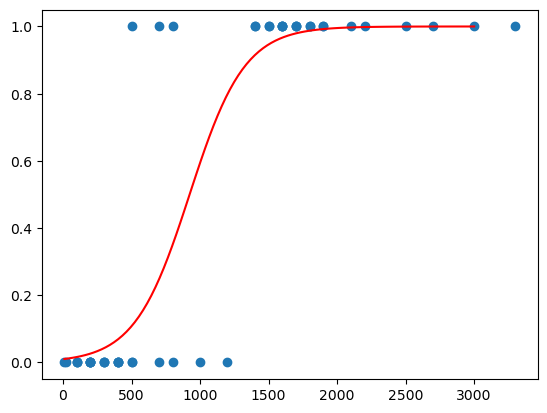

In [56]:
plt.scatter(x,y)

x_teste = np.linspace(10, 3000, 100)
# Implementação da função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))
# Geração de previsões (variável r) e visualização dos resultados
r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(x_teste, r, color = 'red')

In [68]:
base_previsoes = pd.read_csv('datasets\Candidatos.csv', sep = ';')
base_previsoes.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [58]:
despesas = base_previsoes.iloc[:,1].values
despesas = despesas.reshape(-1,1)
previsao = modelo.predict(despesas)

In [69]:
previsoes = np.column_stack((base_previsoes, previsao))
previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)